# Exploratory Data Analysis

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns

Loading the dataset:

In [4]:
df_path = "C:/Users/migue/Data Science/Master Data Science/KSCHOOL/9. TFM/0. Latest News Classificator/01. Dataset Creation/"
df_path2 = df_path + 'News_dataset.csv'
df = pd.read_csv(df_path2, sep=';')

In [5]:
df.head()

,File_Name,Content,Category,Complete_Filename
0,001.txt,Ad sales boost Time Warner profit\r\n\r\nQuart...,business,001.txt-business
1,002.txt,Dollar gains on Greenspan speech\r\n\r\nThe do...,business,002.txt-business
2,003.txt,Yukos unit buyer faces loan claim\r\n\r\nThe o...,business,003.txt-business
3,004.txt,High fuel prices hit BA's profits\r\n\r\nBriti...,business,004.txt-business
4,005.txt,Pernod takeover talk lifts Domecq\r\n\r\nShare...,business,005.txt-business


### Number of articles in each category:

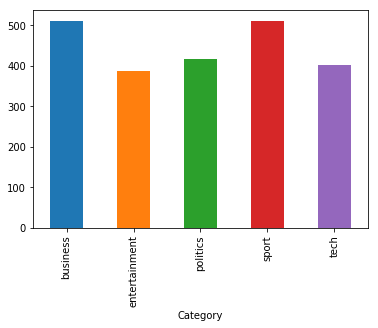

In [15]:
df.groupby('Category')['File_Name'].count().plot.bar();

The classes are approximately balanced. We'll first try to train the models without oversampling/undersampling. If we see some bias in the model, we'll use these techniques.

### News length by category

Definition of news length field. Although there are still special characters in the text (``\r, \n``), it will be useful as an approximation.

In [25]:
df['News_length'] = df['Content'].str.len()

In [26]:
df.head()

,File_Name,Content,Category,Complete_Filename,News_length
0,001.txt,Ad sales boost Time Warner profit\r\n\r\nQuart...,business,001.txt-business,2569
1,002.txt,Dollar gains on Greenspan speech\r\n\r\nThe do...,business,002.txt-business,2257
2,003.txt,Yukos unit buyer faces loan claim\r\n\r\nThe o...,business,003.txt-business,1557
3,004.txt,High fuel prices hit BA's profits\r\n\r\nBriti...,business,004.txt-business,2421
4,005.txt,Pernod takeover talk lifts Domecq\r\n\r\nShare...,business,005.txt-business,1575


C:\Users\migue\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


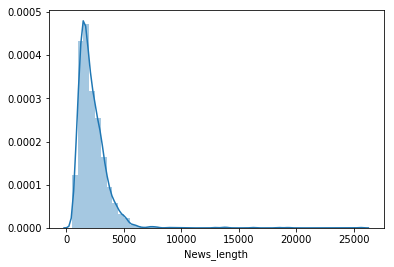

In [30]:
sns.distplot(df['News_length']);

In [32]:
df['News_length'].describe()

count     2225.000000
mean      2274.363596
std       1370.782663
min        506.000000
25%       1454.000000
50%       1978.000000
75%       2814.000000
max      25596.000000
Name: News_length, dtype: float64

Let's remove from the 95% percentile onwards to better appreciate the histogram:

In [53]:
quantile_95 = df['News_length'].quantile(0.95)
df_95 = df[df['News_length'] < quantile_95]

C:\Users\migue\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


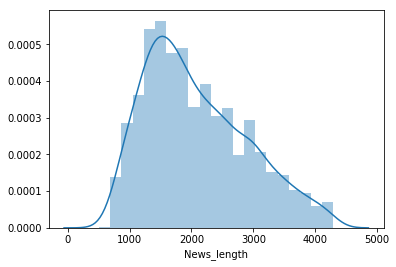

In [54]:
sns.distplot(df_95['News_length']);

Number of news with more than 10,000 characters:

In [36]:
df_more10k = df[df['News_length'] > 10000]
len(df_more10k)

7

Let's see one:

In [44]:
df_more10k['Content'].iloc[0]

'Scissor Sisters triumph at Brits\r\n\r\nUS band Scissor Sisters led the winners at the UK music industry\'s Brit Awards, walking off with three prizes. The flamboyant act scored a hat-trick in the international categories, winning the best group, best album and best newcomer awards. Glasgow group Franz Ferdinand won two prizes, as did Keane and Joss Stone, who was voted best urban act by digital TV viewers. Robbie Williams\' Angels was named the best song of the past 25 years. Scissor Sisters frontwoman Ana Matronic collected the best international album prize from singer Siouxsie Sioux. She told the audience: "If you told us a year ago we would be getting these awards today we would have called you crazy. You guys made our dream come true."\r\n\r\nThe band - whose self-titled LP was 2004\'s biggest-selling album - thanked "all the members of the sisterhood", adding: "We wouldn\'t be here without you." The US band, who opened the show with Take Your Mama, won the best international ac

Just a large news article.

At this point, we cannot do further Exploratory Data Analysis. We'll turn onto the **Feature Engineering** section.

Saving the dataset:

In [18]:
with open('News_dataset.pickle', 'wb') as output:
    pickle.dump(df, output)